## Logistic Regression Example

Type: Supervised<br/>

Create a logistic regression model to predict whether someone has diabetes from a set of features.<br/>
We train on 60% of the data and test on the remaining 40%.<br/>
We then print a confusion matrix (True Negatives, True Positives, False Negatives, False Positives) and a classification report<br>
Following that, we plot an ROC curve that shows the relationship between False Positive and True Positive rates.<br/>
Lastly, we use Grid Search to find the best regularization parameter (C) for the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/diabetes.csv')

X = df.drop(['diabetes'], axis=1).values
y = df['diabetes'].values

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



### ROC Curve (what happens when the threshold varies?)

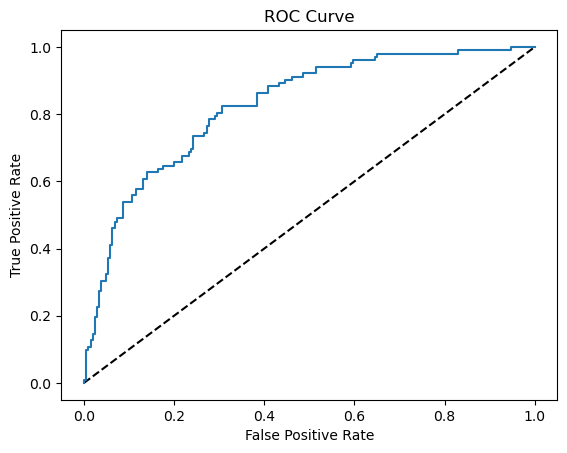

In [4]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Grid Search (to find the best hyperparameters)

Logistic regression has a regularization parameter, C, that controls the inverse of the regularization strength.

A large C can lead to overfitting.  A small C can lead to underfitting.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Split the examples into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(X_test)

logreg_cv_score = logreg_cv.score(X_test, y_test)
print(logreg_cv_score)

print("R^2: {}".format(logreg_cv.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.7760869565217391
0.775974025974026
R^2: 0.775974025974026
Root Mean Squared Error: 0.4733138219257642
